## Importing IRIS Dataset

In [1]:
import pandas as pd

In [45]:
df = pd.read_csv('Iris.csv')

## Data Exploration

In [46]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
df = df.rename(columns={'SepalLengthCm': 'sepal length (cm)'})
df = df.rename(columns={'SepalWidthCm': 'sepal width (cm)'})
df = df.rename(columns={'PetalLengthCm': 'petal length (cm)'})
df = df.rename(columns={'PetalWidthCm': 'petal width (cm)'})

In [48]:
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

df['target'] = df['Species'].replace(mapping)

In [49]:
df

,Id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


#### Data Types

In [7]:
df.dtypes

Id                     int64
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species               object
target                 int64
dtype: object

#### No Null Values

In [8]:
df.isnull().sum()

Id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
target               0
dtype: int64

## Data Visualiztion

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = df.drop(['target','Id'],axis =1)
target = df['target']

#### Boxplot

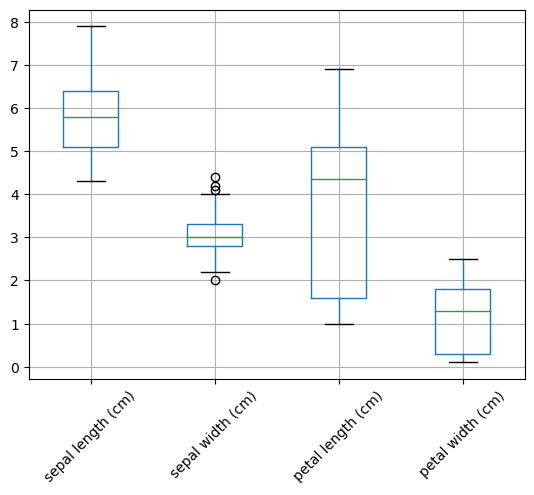

In [11]:
data.boxplot()
plt.xticks(rotation = 45)
plt.show()

#### Histogram

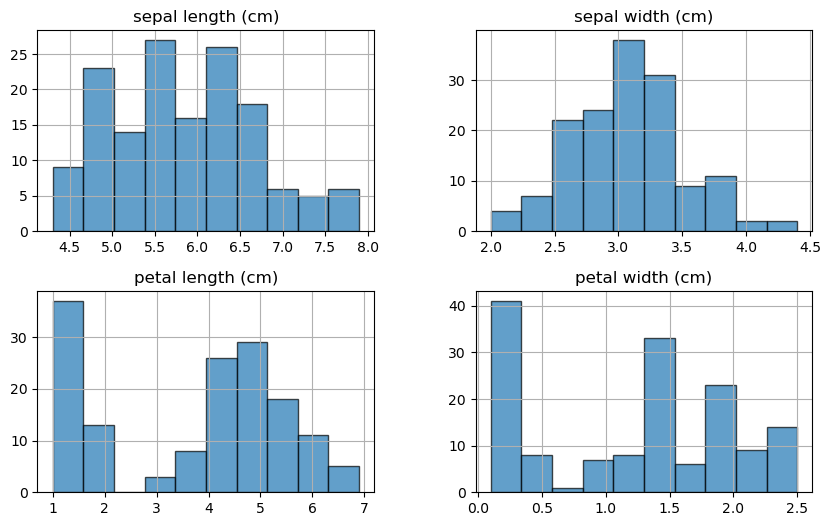

In [12]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']                           

df[columns].hist(figsize=(10,6), bins = 10, edgecolor = 'black', alpha = 0.7)
plt.show()

#### Pie Chart

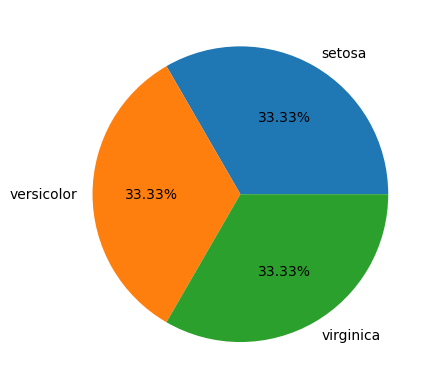

In [13]:
tar_counts = target.value_counts()

plt.pie(tar_counts,labels = ['setosa' ,'versicolor', 'virginica'], autopct = '%1.2f%%')
plt.show()

## Hypothesis Testing

#### Using Two sample independent T-Test

In [14]:
from scipy import stats

#### sepal length (cm)

In [15]:
statistics, p_value = stats.ttest_ind(df['sepal length (cm)'],target)

print('T-Statistic value : ',statistics)
print('p_value : ',p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is no significant difference')
else:
    print('Accepth the null hypothesis. There is significant difference')

T-Statistic value :  50.92447470978208
p_value :  4.3976139318972605e-149
Reject the null hypothesis. There is no significant difference


#### sepal width (cm)

In [16]:
statistics, p_value = stats.ttest_ind(df['sepal width (cm)'],target)

print('T-Statistic value : ',statistics)
print('p_value : ',p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is no significant difference')
else:
    print('Accepth the null hypothesis. There is significant difference')

T-Statistic value :  27.140187506375852
p_value :  1.5682640110953274e-82
Reject the null hypothesis. There is no significant difference


#### petal length (cm)

In [17]:
statistics, p_value = stats.ttest_ind(df['petal length (cm)'],target)

print('T-Statistic value : ',statistics)
print('p_value : ',p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is no significant difference')
else:
    print('Accepth the null hypothesis. There is significant difference')

T-Statistic value :  17.368043963490543
p_value :  3.6627329045368355e-47
Reject the null hypothesis. There is no significant difference


#### petal width (cm)

In [18]:
statistics, p_value = stats.ttest_ind(df['petal width (cm)'],target)

print('T-Statistic value : ',statistics)
print('p_value : ',p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is no significant difference')
else:
    print('Accepth the null hypothesis. There is significant difference')

T-Statistic value :  2.173195981219609
p_value :  0.030553031451480587
Reject the null hypothesis. There is no significant difference


## Model Building

### Decision Tree

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
X = df.drop(['Id','target','Species'], axis =1)
y = df['Species']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 20)

In [35]:
dtc = DecisionTreeClassifier()

In [36]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dtc.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)

In [39]:
accuracy

0.9333333333333333

#### Accuracy = 0.9333333333333333

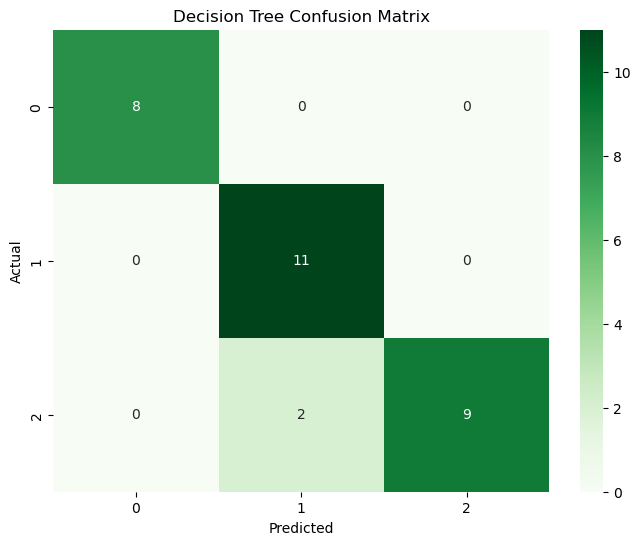

In [40]:
#Confusion Matrix for Decision Tree
decision_tree_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(decision_tree_cm, annot=True, cmap='Greens', fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
from sklearn.tree import plot_tree

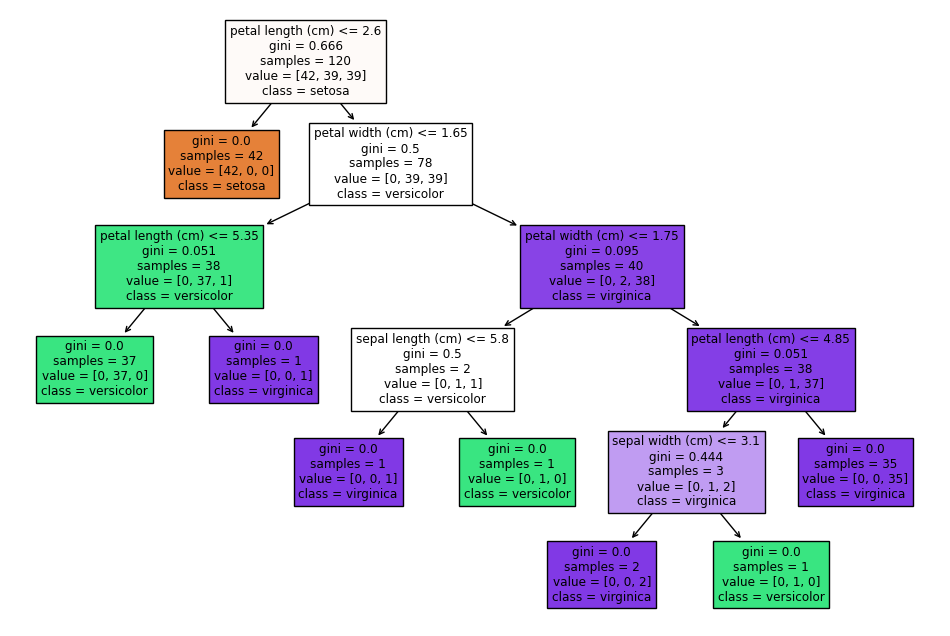

In [41]:
plt.figure(figsize=(12,8))
plot_tree(dtc, filled = True, feature_names =['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ,class_names = ['setosa', 'versicolor' ,'virginica'])
plt.show()

#### To classify New Data

In [42]:
new_data = ['5.2','3.3','1.4','0.6']

In [44]:
pred = dtc.predict([new_data])
print(pred)

['Iris-setosa']
